# **Testing - Model Brain Tumor Classification**

In [ ]:
     !pip install -U -q PyDrive ## you will have install for every colab session

     from pydrive.auth import GoogleAuth
     from pydrive.drive import GoogleDrive
     from google.colab import auth
     from oauth2client.client import GoogleCredentials

     # 1. Authenticate and create the PyDrive client.
     auth.authenticate_user()
     gauth = GoogleAuth()
     gauth.credentials = GoogleCredentials.get_application_default()
     drive = GoogleDrive(gauth)

In [ ]:
#Model Nadam
json_import = drive.CreateFile({'id':'1d3gOpd7JvJ1ry4A_ADcsI0M2tjSo5X71'})
json_import.GetContentFile('ModelNadam.json')

h5_import = drive.CreateFile({'id':'1cwxpQex0GNF0gbatXQRSGfVvyNo6JEr4'})
h5_import.GetContentFile('ModelNadam.h5')


In [ ]:
#Model Adam
Adamjson_import = drive.CreateFile({'id':'1dFgA7TJHd9ilQbdXm5fc6lmsEC3UUTgO'})
Adamjson_import.GetContentFile('ModelAdam.json')

Adamh5_import = drive.CreateFile({'id':'1d7uBcaZtq-yg_LK9JCfJ0JhQXz-6YiKp'})
Adamh5_import.GetContentFile('ModelAdam.h5')

In [ ]:
#library
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# load json and create Model Nadam
json_file = open('/content/ModelNadam.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
ModelNadam = model_from_json(loaded_model_json)

# load weights into new Model Nadam
ModelNadam.load_weights("/content/ModelNadam.h5")
print("Loaded Model Nadam from disk")

# evaluate loaded model on test data (Nadam)
ModelNadam.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

Loaded Model Nadam from disk


In [ ]:
# load json and create Model Adam
Adamjson_file = open('/content/ModelAdam.json', 'r')
Adamloaded_model_json = Adamjson_file.read()
Adamjson_file.close()
ModelAdam = model_from_json(Adamloaded_model_json)

# load weights into new Model Adam
ModelAdam.load_weights("/content/ModelAdam.h5")
print("Loaded Model Adam from disk")

# evaluate loaded model on test data (Adam)
ModelNadam.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
ModelAdam.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Loaded Model Adam from disk


Saving 3 no.jpg to 3 no.jpg
3 no.jpg
Gambar dengan Optimizer Nadam: ini adalah Tumor Otak
Gambar dengan Optimizer Adam: ini adalah No Tumor Otak


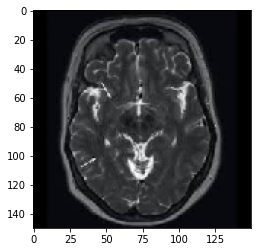

In [ ]:
#Predict use Nadam dan Adam Model
from google.colab import files
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = ModelNadam.predict(images, batch_size=10)
  classes2 = ModelAdam.predict(images, batch_size=10)

  print(fn)

  if classes[0,0] !=0:
    print("Gambar dengan Optimizer Nadam: ini adalah Tumor Otak")
  else:
    print("Gambar dengan Optimizer Nadam: ini adalah No Tumor Otak")

  if classes2[0,0] !=0:
    print("Gambar dengan Optimizer Adam: ini adalah Tumor Otak")
  else:
    print("Gambar dengan Optimizer Adam: ini adalah No Tumor Otak")